In [1]:
import numpy as np
from tensorflow.keras import Sequential, layers, losses, optimizers, activations, Model, datasets, models
import tensorflow as tf

tf.random.set_seed(7)
np.random.seed(seed=7)

In [3]:
### pair the instances in the dataset to get referential games with one target and one distractor 

for ME in [False]:
    (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
    
    if ME: 
        n_classes = 9
        ME_indices = np.where(train_labels==9)[0]
        ME_labels = train_labels[ME_indices]   
        test_indices = np.where(test_labels!=9)[0]
        test_labels = test_labels[test_indices]
        train_indices = np.random.permutation(np.where(train_labels!=9)[0])
    else: 
        n_classes = 10 
        test_indices = np.arange(len(test_labels)) 
        train_indices = np.random.permutation(len(train_labels))
    
    train_labels = train_labels[train_indices]
    
    distractor_indices_all = []
    distractor_labels_all = []
    
    for cat, labels in enumerate([train_labels, test_labels]):
        category_indices = [train_indices, test_indices][cat]
        
        distractor_indices = np.zeros(len(labels), dtype=np.int32)
        distractor_labels = np.zeros(len(labels), dtype=np.int32)
        indices_classes = [np.where(labels==i)[0] for i in range(n_classes)]
        indices_other = [np.where(labels!=i)[0] for i in range(n_classes)]
    
        for i, indices in enumerate(indices_classes):
            selected_indices = np.random.choice(indices_other[i], replace=False, size=len(indices))
            distractor_indices[labels==i] = category_indices[selected_indices]
            distractor_labels[labels==i] = labels[selected_indices]
            
        distractor_indices_all.append(distractor_indices)
        distractor_labels_all.append(distractor_labels)
    
    train_dist_indices, test_dist_indices = distractor_indices_all
    train_dist_labels, test_dist_labels = distractor_labels_all
    
    if ME: 
        np.save('train_test_ME', [(train_indices, train_labels, train_dist_indices, train_dist_labels), 
                                  (test_indices, test_labels, test_dist_indices, test_dist_labels), 
                                  (ME_indices, ME_labels)])
    else: 
        np.save('train_test', [(train_indices, train_labels, train_dist_indices, train_dist_labels), 
                               (test_indices, test_labels, test_dist_indices, test_dist_labels)])

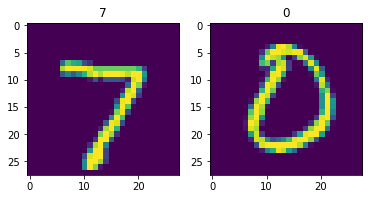

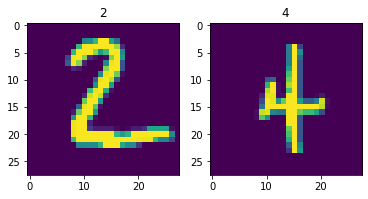

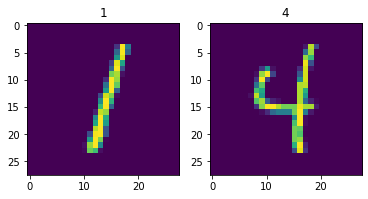

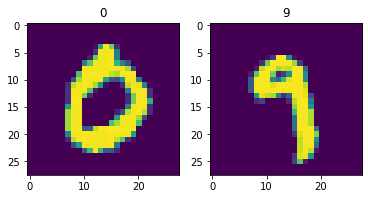

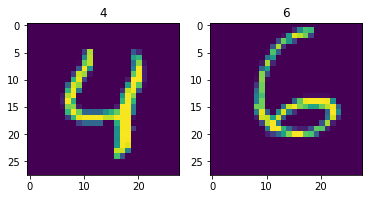

In [6]:
import matplotlib.pyplot as plt

test = 1
indices = [train_indices, test_indices][test]
dist_indices = [train_dist_indices, test_dist_indices][test]
labels = [train_labels, test_labels][test]
dist_labels = [train_dist_labels, test_dist_labels][test]
images = [train_images, test_images][test]
for i in range(5):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(images[indices][i])
    plt.title(labels[i])
    plt.subplot(1,2,2)
    plt.imshow(images[dist_indices][i])
    plt.title(dist_labels[i])
    plt.show()